<a href="https://colab.research.google.com/github/dp1706/Machine-Learning/blob/master/Assignment%205/Naive_Bays_Classifier_From_Scratch_method2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_breast_cancer
import numpy as np
from scipy.stats import norm 
print("True")

True


# NAIVE BAYS FOR BREAST CANCER DATASET FROM SCRATCH

In [ ]:
#loading dataset
dataset = load_breast_cancer()
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
#dataset features
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
#data value
data = pd.DataFrame(dataset.data,columns=dataset.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#target value
target = pd.DataFrame(dataset.target,columns=['Class'])
target.head()

,Class
0,0
1,0
2,0
3,0
4,0


total number of 'benign' 357
total number of 'Malignant' 212


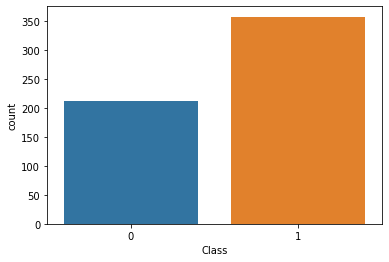

In [ ]:
#count and plot of class element 

B,M = target['Class'].value_counts()
print("total number of 'benign'",B)
print("total number of 'Malignant'",M)

sns.countplot(data=target,x=target['Class'],label='Class')
plt.show()

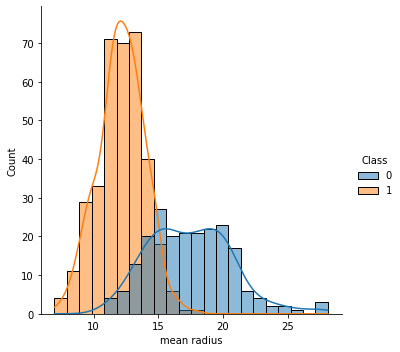

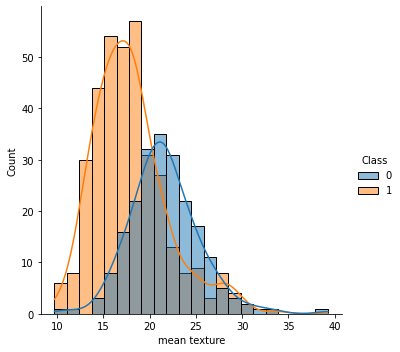

In [24]:
sns.displot(data.join(target),x='mean radius',hue='Class',kde=True)
plt.show()

sns.displot(data.join(target),x='mean texture',hue='Class',kde=True)
plt.show()

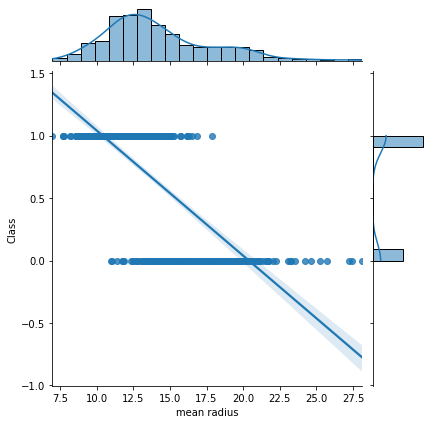

In [34]:
sns.jointplot(x='mean radius',y='Class',data=data.join(target),kind='reg')
plt.show()

In [ ]:
#Train test set splitting

X_train,X_test,Y_train,Y_test = train_test_split(data,target,test_size=0.2)
(X_train.shape,Y_train.shape)

((455, 30), (455, 1))

In [ ]:
#mean and Standard deviation

mean = X_train.groupby(Y_train['Class']).mean()
std  = X_train.groupby(Y_train['Class']).std()

In [ ]:
mean

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.236294,21.672706,113.864118,949.891176,0.103039,0.145823,0.159295,0.087213,0.193004,0.062997,0.583178,1.221864,4.127547,67.205471,0.006732,0.032258,0.041754,0.015072,0.020418,0.004131,20.866529,29.516765,139.432412,1384.454706,0.145378,0.377147,0.452113,0.182205,0.322612,0.092276
1,12.124712,17.945123,77.909088,461.244561,0.092873,0.079351,0.044192,0.025176,0.174300,0.062762,0.278003,1.199732,1.973255,20.593488,0.007229,0.020523,0.024140,0.009522,0.020547,0.003469,13.359291,23.580807,86.865298,557.068070,0.125978,0.181035,0.163688,0.073950,0.271959,0.079386


In [ ]:
std

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.024171,3.880390,20.520877,333.215652,0.012202,0.055836,0.072034,0.033223,0.028032,0.007842,0.269921,0.482062,1.984777,39.918255,0.002689,0.018534,0.021520,0.005619,0.010388,0.002147,4.149874,5.573052,28.133718,561.451528,0.022055,0.178855,0.188523,0.047215,0.073606,0.022469
1,1.803139,4.184042,11.982092,135.376391,0.013575,0.033541,0.039557,0.015547,0.024750,0.006555,0.102191,0.590138,0.748875,7.936957,0.003105,0.015393,0.026666,0.005204,0.007085,0.002367,1.999416,5.745012,13.718325,164.160138,0.020243,0.093552,0.141181,0.036379,0.042809,0.013395


In [ ]:
#class probability

prob = X_train.groupby(Y_train['Class']).apply(lambda x: len(x))/ len(X_train)
prob

Class
0    0.373626
1    0.626374
dtype: float64

In [ ]:
#main Function
def Bays_classifier(x,y,mean,std,prob):
  y_pred = []

  for row in range(len(x)):
    p = {}
    
    for c in np.unique(y):
      p[c] = prob.iloc[c]

      for index , elem in enumerate(x.iloc[row]):
        p[c] *=norm.pdf(elem, mean.iloc[c, index], std.iloc[c, index])
    y_pred.append(pd.Series(p).values.argmax())
  return y_pred


In [ ]:
#Finding Accuracy
def Accuracy(Y_pred , Y_test):
  count = 0
  for i,j in zip(Y_test.iloc[:,0],Y_pred[:]):
    if i == j:
      count += 1
  return count/float(len(Y_pred))

In [ ]:
#Test
Y_pred = Bays_classifier(X_test,Y_test,mean,std,prob)


In [ ]:
#Accuracy of the Model

acc = Accuracy(Y_pred,Y_test)
print("Accuracy of the Bays Classifier is : {:.2f}%".format(acc*100))

Accuracy of the Bays Classifier is : 95.61%
